In [1]:
import os

In [2]:
import pandas as pd

In [2]:
from datasets import load_dataset

# Load the LIAR dataset
dataset = load_dataset("liar", trust_remote_code=True)

# Inspect the dataset splits
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 10269
    })
    test: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 1283
    })
    validation: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 1284
    })
})


In [6]:
fake = pd.read_csv('dataset/gossipcop_fake.csv')

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 10269
    })
    test: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 1283
    })
    validation: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 1284
    })
})

In [20]:
dataset['train'][2]

{'id': '324.json',
 'label': 2,
 'statement': 'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."',
 'subject': 'foreign-policy',
 'speaker': 'barack-obama',
 'job_title': 'President',
 'state_info': 'Illinois',
 'party_affiliation': 'democrat',
 'barely_true_counts': 70.0,
 'false_counts': 71.0,
 'half_true_counts': 160.0,
 'mostly_true_counts': 163.0,
 'pants_on_fire_counts': 9.0,
 'context': 'Denver'}

C:\Users\kkaga\AppData\Local\Temp\ipykernel_37932\1219546522.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


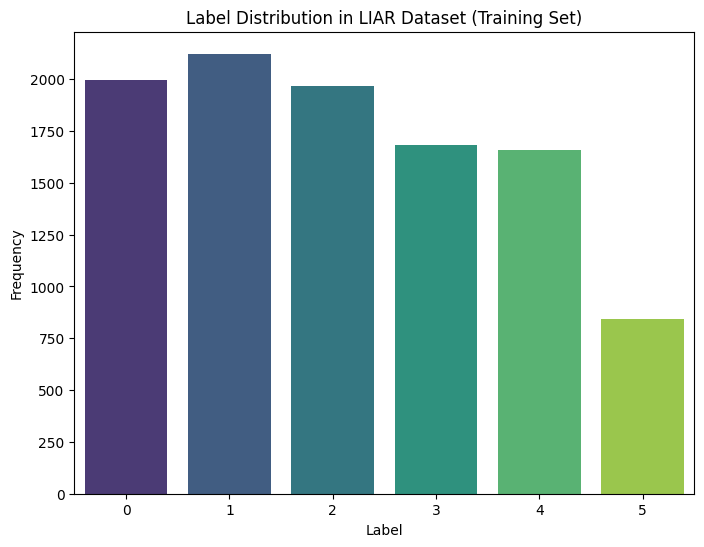

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the list of labels into a pandas Series
labels = pd.Series(dataset['train']['label'])

# Get the label counts
label_counts = labels.value_counts()

# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

# Customize the plot
plt.title('Label Distribution in LIAR Dataset (Training Set)')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [19]:
import pandas as pd

# Convert the train data to a pandas DataFrame
train_data_df = pd.DataFrame(dataset['train'])

# Calculate the average label for each speaker and their number of statements
speaker_stats = train_data_df.groupby('speaker').agg(
    average_label=('label', 'mean'),
    num_statements=('label', 'size')
)

# Filter speakers with at least 10 statements
filtered_speakers = speaker_stats[speaker_stats['num_statements'] >= 50]

# Sort by the lowest average label (most dishonest)
most_dishonest_speakers = filtered_speakers.sort_values('average_label', ascending=True).head(40)

# Display the most dishonest speakers with their number of statements
print(most_dishonest_speakers)


                 average_label  num_statements
speaker                                       
charlie-crist         1.800000              70
scott-walker          1.946667             150
barack-obama          1.953347             493
sarah-palin           1.961538              52
chris-christie        1.987179              78
john-boehner          2.000000              50
john-mccain           2.000000             148
rick-scott            2.017391             115
joe-biden             2.031746              63
marco-rubio           2.034188             117
donald-trump          2.054745             274
bernie-s              2.056180              89
hillary-clinton       2.138075             239
rick-perry            2.147887             142
mitt-romney           2.166667             180
newt-gingrich         2.202899              69
ted-cruz              2.236559              93
paul-ryan             2.250000              56
jeb-bush              2.333333              63
facebook-post

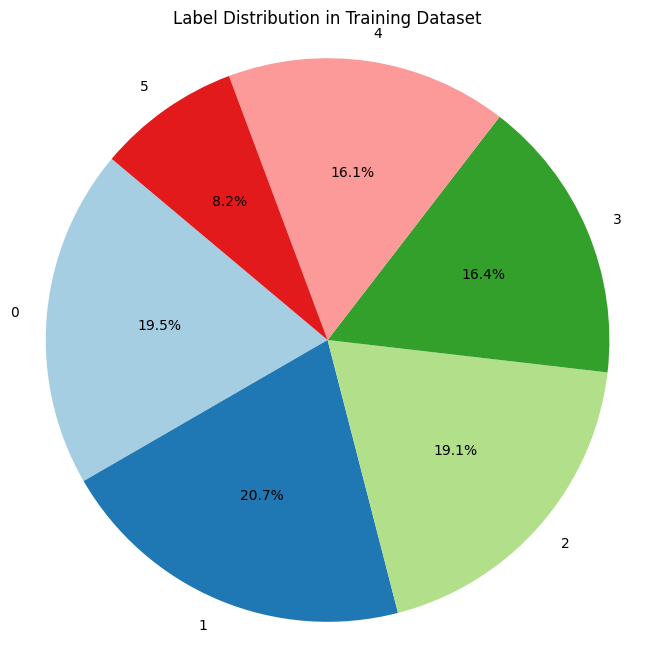

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the occurrences of each label in the training set
label_counts = Counter(dataset['train']['label'])

# Prepare data for the pie chart
labels = list(label_counts.keys())
sizes = list(label_counts.values())

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Label Distribution in Training Dataset")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


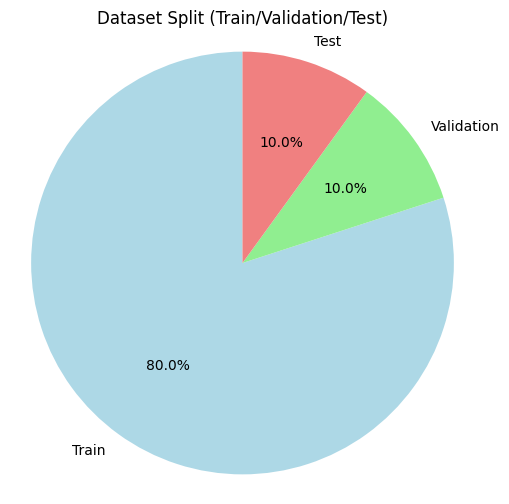

In [4]:
import matplotlib.pyplot as plt

# Dataset split information
labels = ['Train', 'Validation', 'Test']
sizes = [10269, 1284, 1283]

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Add a title
plt.title("Dataset Split (Train/Validation/Test)")

# Show the plot
plt.show()


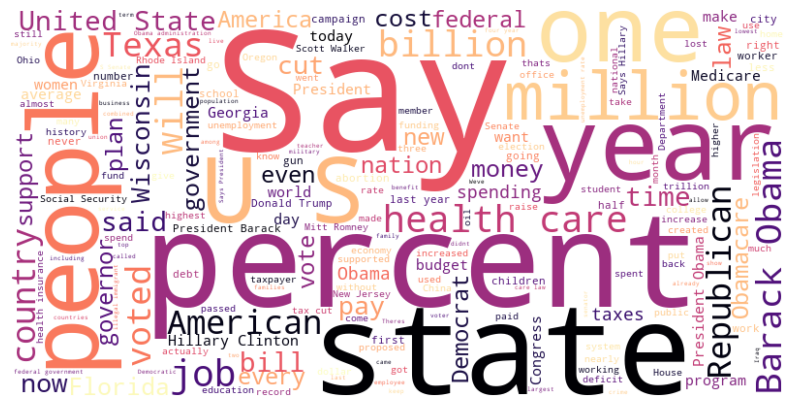

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from wordcloud import STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(statements)


# Assuming 'dataset' is your DatasetDict and 'train' is the training split
statements = " ".join(dataset['train']['statement'])  # Combine all statements into one string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='magma').generate(statements)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.title("Word Cloud of Statements in Training Data", fontsize=16)
plt.show()


In [16]:
wordcloud.to_file("wordcloud.png")